In [6]:
import torch
from helpers import RegularizedClassSpecificImageGeneration
from helpers import plot_image_grid
from PIL import Image

# Set paths and variables

In [2]:
DATA_PATH = './15SceneData/'
MODELS_PATH = './models/'
PLOTS_PATH = './plots/inversion/'
MODEL_NAMES = [
    'efficientnetb0_v2', 
    'efficientnetb0_pretrianed_fe_freeze',
    'rotation_supervised',
    'perturbation_supervised'
]

DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")  # run on MPS if available

# Run inversion scripts to generate visualisations for given models

In [4]:
# Generate inversion plots for all models and all classes
for model_name in MODEL_NAMES:
    for target_class in range(15):
        print('Target class:', target_class)
        model = torch.load(MODELS_PATH+ model_name +'.pt').to(DEVICE)
        csig = RegularizedClassSpecificImageGeneration(model, target_class, DEVICE, save_folder_name=PLOTS_PATH + model_name)
        result = csig.generate(iterations=160, blur_freq=1, blur_rad=2, wd=0.0001, clipping_value=0.1)

Target class: 0
Iteration: 17 Loss -14.79 LR: 6.00
Iteration: 35 Loss -20.06 LR: 6.00
Iteration: 53 Loss -23.42 LR: 6.00
Iteration: 71 Loss -24.52 LR: 6.00
Iteration: 88 Loss -22.27 LR: 6.00
Iteration: 106 Loss -24.05 LR: 6.00
Iteration: 124 Loss -22.99 LR: 6.00
Iteration: 142 Loss -25.22 LR: 6.00
Target class: 1
Iteration: 17 Loss -11.20 LR: 6.00
Iteration: 35 Loss -14.48 LR: 6.00
Iteration: 53 Loss -14.14 LR: 6.00
Iteration: 71 Loss -16.84 LR: 6.00
Iteration: 88 Loss -14.84 LR: 6.00
Iteration: 106 Loss -15.25 LR: 6.00
Iteration: 124 Loss -16.96 LR: 6.00
Iteration: 142 Loss -17.31 LR: 6.00
Target class: 2
Iteration: 17 Loss -11.93 LR: 6.00
Iteration: 35 Loss -11.68 LR: 6.00
Iteration: 53 Loss -12.41 LR: 6.00
Iteration: 71 Loss -13.27 LR: 6.00
Iteration: 88 Loss -14.66 LR: 6.00
Iteration: 106 Loss -16.47 LR: 6.00
Iteration: 124 Loss -14.39 LR: 6.00
Iteration: 142 Loss -14.56 LR: 6.00
Target class: 3
Iteration: 17 Loss -6.55 LR: 6.00
Iteration: 35 Loss -6.78 LR: 6.00
Iteration: 53 Loss 

# Plot images in a grid

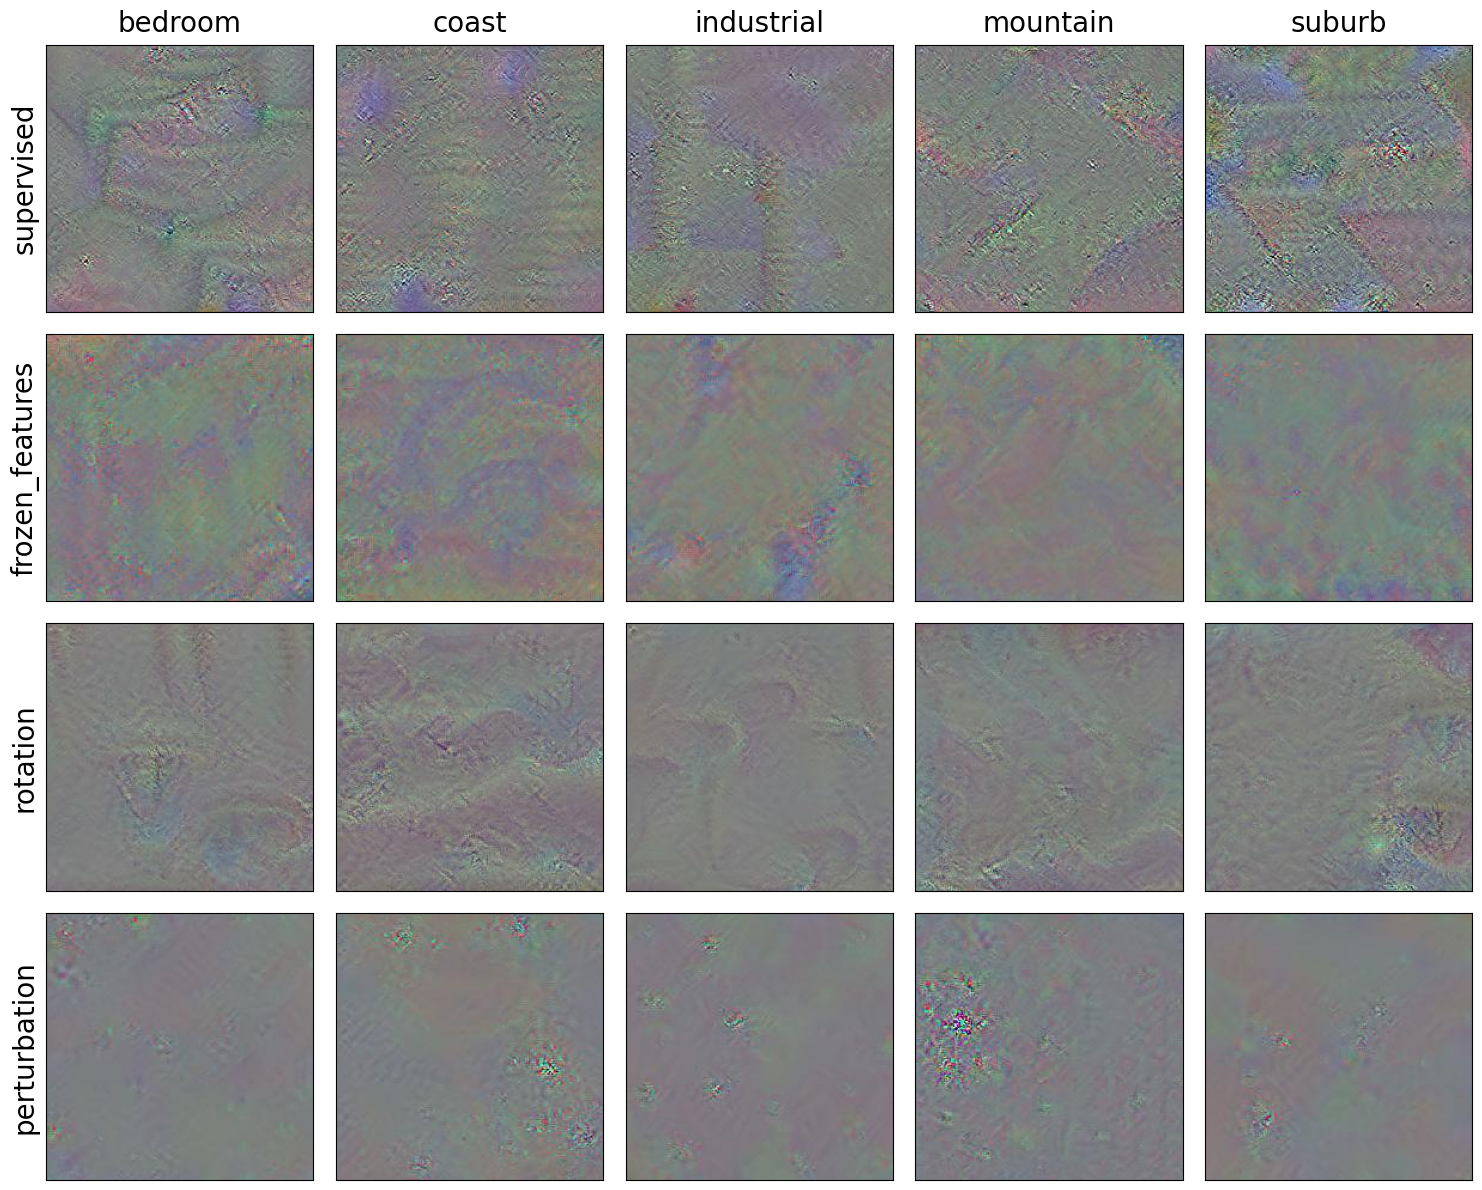

In [10]:
# Classes in dataset are as follows:
# {'bedroom': 0,
#  'coast': 1,
#  'forest': 2,
#  'highway': 3,
#  'industrial': 4,
#  'insidecity': 5,
#  'kitchen': 6,
#  'livingroom': 7,
#  'mountain': 8,
#  'office': 9,
#  'opencountry': 10,
#  'store': 11,
#  'street': 12,
#  'suburb': 13,
#  'tallbuilding': 14}
# 0, 1, 4, 8, 13
col_labels = ['bedroom', 'coast', 'industrial', 'mountain', 'suburb']
row_labels = ['supervised', 'frozen_features', 'rotation', 'perturbation']

# Have to inspect the images to see which ones are have the lowest loss
images = [
    # efficientnetb0_v2
    Image.open('plots/inversion/efficientnetb0_v2/class_0_blurfreq_1_blurrad_2_wd0.0001/c_0_iter_142_loss_-25.215484619140625.jpg'),
    Image.open('plots/inversion/efficientnetb0_v2/class_1_blurfreq_1_blurrad_2_wd0.0001/c_1_iter_142_loss_-17.307342529296875.jpg'),
    Image.open('plots/inversion/efficientnetb0_v2/class_4_blurfreq_1_blurrad_2_wd0.0001/c_4_iter_159_loss_-21.43089485168457.jpg'),
    Image.open('plots/inversion/efficientnetb0_v2/class_8_blurfreq_1_blurrad_2_wd0.0001/c_8_iter_159_loss_-18.79384994506836.jpg'),
    Image.open('plots/inversion/efficientnetb0_v2/class_13_blurfreq_1_blurrad_2_wd0.0001/c_13_iter_142_loss_-28.07151222229004.jpg'),
    # efficientnetb0_pretrianed_fe_freeze
    Image.open('plots/inversion/efficientnetb0_pretrianed_fe_freeze/class_0_blurfreq_1_blurrad_2_wd0.0001/c_0_iter_159_loss_-7.778724670410156.jpg'),
    Image.open('plots/inversion/efficientnetb0_pretrianed_fe_freeze/class_1_blurfreq_1_blurrad_2_wd0.0001/c_1_iter_159_loss_-13.681991577148438.jpg'),
    Image.open('plots/inversion/efficientnetb0_pretrianed_fe_freeze/class_4_blurfreq_1_blurrad_2_wd0.0001/c_4_iter_124_loss_-8.722078323364258.jpg'),
    Image.open('plots/inversion/efficientnetb0_pretrianed_fe_freeze/class_8_blurfreq_1_blurrad_2_wd0.0001/c_8_iter_159_loss_-7.527202129364014.jpg'),
    Image.open('plots/inversion/efficientnetb0_pretrianed_fe_freeze/class_13_blurfreq_1_blurrad_2_wd0.0001/c_13_iter_142_loss_-8.630816459655762.jpg'),
    # rotation_supervised
    Image.open('plots/inversion/rotation_supervised/class_0_blurfreq_1_blurrad_2_wd0.0001/c_0_iter_106_loss_-13.556143760681152.jpg'),
    Image.open('plots/inversion/rotation_supervised/class_1_blurfreq_1_blurrad_2_wd0.0001/c_1_iter_142_loss_-10.85226058959961.jpg'),
    Image.open('plots/inversion/rotation_supervised/class_4_blurfreq_1_blurrad_2_wd0.0001/c_4_iter_88_loss_-6.644726276397705.jpg'),
    Image.open('plots/inversion/rotation_supervised/class_8_blurfreq_1_blurrad_2_wd0.0001/c_8_iter_159_loss_-9.811716079711914.jpg'),
    Image.open('plots/inversion/rotation_supervised/class_13_blurfreq_1_blurrad_2_wd0.0001/c_13_iter_142_loss_-11.984807968139648.jpg'),
    # perturbation_supervised
    Image.open('plots/inversion/perturbation_supervised/class_0_blurfreq_1_blurrad_2_wd0.0001/c_0_iter_159_loss_-2.841688871383667.jpg'),
    Image.open('plots/inversion/perturbation_supervised/class_1_blurfreq_1_blurrad_2_wd0.0001/c_1_iter_106_loss_-1.2460081577301025.jpg'),
    Image.open('plots/inversion/perturbation_supervised/class_4_blurfreq_1_blurrad_2_wd0.0001/c_4_iter_142_loss_-3.9159295558929443.jpg'),
    Image.open('plots/inversion/perturbation_supervised/class_8_blurfreq_1_blurrad_2_wd0.0001/c_8_iter_159_loss_-4.548696041107178.jpg'),
    Image.open('plots/inversion/perturbation_supervised/class_13_blurfreq_1_blurrad_2_wd0.0001/c_13_iter_159_loss_-1.573992133140564.jpg')
]

inversion_plot = plot_image_grid(images, row_labels, col_labels)

In [12]:
inversion_plot.savefig(PLOTS_PATH + 'inversion_plot.png', bbox_inches='tight', dpi=300)